In [0]:
!pip install -U finance-datareader

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.6/dist-packages (0.8.2)


In [0]:
import FinanceDataReader as fdr
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')

In [0]:
df_krx.head()
#Symbol 종목코드

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [0]:
name=input('주식 코드 기업명 ?') #find 종목코드 및 정보
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명 ?하림


,Symbol,Name,Sector,Industry
2023,003380,하림지주,기타 금융업,지주사업
2300,136480,하림,"도축, 육류 가공 및 저장 처리업","육계, 육계가공식품"


In [0]:
gkimport pandas as pd
import datetime

In [0]:
ss=fdr.DataReader('005930', '1995-01-01')
ss.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1996-02-14,1735,1755,1708,1736,160300,NaN
1996-02-15,1735,1755,1728,1756,149510,0.011521
1996-02-16,1748,1802,1748,1802,147300,0.026196


# 셀트리온 주가정보를 불러오시오.

In [0]:
name=input('주식 코드 기업명 ?') #find 종목코드 및 정보
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명 ?셀트리온


,Symbol,Name,Sector,Industry
947,068270,셀트리온,기초 의약물질 및 생물학적 제제 제조업,"램시마, 트룩시마, 허쥬마"
1061,068760,셀트리온제약,의약품 제조업,무선인터넷서비스및플랫폼
1921,091990,셀트리온헬스케어,기타 전문 도매업,바이오의약품 마케팅 및 판매


In [0]:
df=fdr.DataReader('068270', '2019-01-01')
df2=fdr.DataReader('005930', '2019-01-01')

# 퀴즈1
코스피 지수
삼성전자 005930

## 데이터 합치기

In [0]:
import pandas as pd
import datetime
today=datetime.datetime.today()
# KS11 (KOSPI 지수), 2018년~현재
kospi = fdr.DataReader('KS11', '2019')
#삼성전자 주가(2018.01.01~현재)
ss=fdr.DataReader('005930', '2019-01-01', today)

In [0]:
import matplotlib.pyplot as plt

In [0]:
fin=pd.concat([kospi['Close'],ss['Close']], axis=1)
fin.set_axis(['kospi','ss'],axis=1,inplace=True)
fin.head(3)

,kospi,ss
Date,,
2019-01-02,2010.00,38750
2019-01-03,1993.70,37600
2019-01-04,2010.25,37450


## kospi가 x일 때

### 1. 산점도 그리고 해석

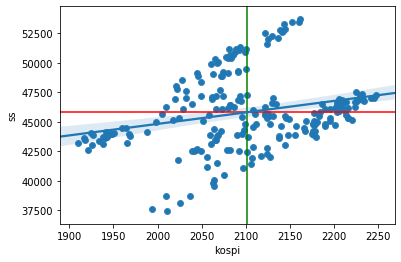

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=fin['kospi'], y=fin['ss'])
plt.axvline(x=fin['kospi'].mean() , linestyle= '-', color = 'g')
plt.axhline(y=fin['ss'].mean() , linestyle= '-', color = 'r')
ax = sns.regplot(x=fin['kospi'], y=fin['ss'])

해석

코스피랑 삼성전자는 양의 상관관계를 갖는다.

In [0]:
fin[['kospi','ss']].corr()

,kospi,ss
kospi,1.000000,0.252997
ss,0.252997,1.000000


### 2. 기울기 b 측정하기

>9.5963

해석

기울기가 1보다 크므로 유동성이 커.

시장보다 주식의 변동이 크다.

### 3. R 제곱 구하기

In [0]:
import statsmodels.api as sm
y=fin['ss']
X=sm.add_constant(fin['kospi'])
model=sm.OLS(y, X).fit() #y~x
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ss   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     14.91
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           0.000149
Time:                        03:46:57   Log-Likelihood:                -2074.0
No. Observations:                 220   AIC:                             4152.
Df Residuals:                     218   BIC:                             4159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.539e+04   5294.237      4.796      0.000     1.5e+04    3.58e+04
kospi          9.7169      2.517      3.861      0.000       4.757      14.677
==============================================================================
Omnibus:                        8.605   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.608
Skew:                           0.478   Prob(JB):                       0.0135
Kurtosis:                       3.157   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y = bx

귀무가설 : 삼성과 코스피는 관계가 없다.
(b = 0)

대립가설 : 삼성과 코스피는 관계가 있다.
(b != 0)

기울기 = 9.7169


2.539e+04

kospi는 삼성 주가에 6.4% 밖에 영향을 미치지 못한다.

0.05 *
0.01 **
0.001 ***


Prob (F-statistic)가 0.001보다 작기 때문에
매우 유의함 ***(별 3개)

귀무가설 기각
kospi의 영향을 많이 받음.

## 수익률

### 1. 산점도 그리고 해석

In [0]:
#fin.set_index('Date',inplace=True)
fin0 = fin.diff(axis=0 , periods=1)/fin.shift(periods=1)

In [0]:
fin1 = fin0.dropna()

In [0]:
fin1.head()

,kospi,ss
Date,,
2019-01-03,-0.008109,-0.029677
2019-01-04,0.008301,-0.003989
2019-01-07,0.013357,0.034713
2019-01-08,-0.005807,-0.016774
2019-01-09,0.019474,0.039370


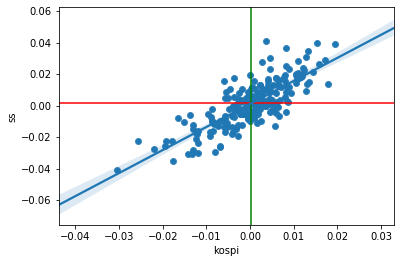

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=fin1['kospi'], y=fin1['ss'])
plt.axvline(x=fin1['kospi'].mean() , linestyle= '-', color = 'g')
plt.axhline(y=fin1['ss'].mean() , linestyle= '-', color = 'r')
ax = sns.regplot(x=fin1['kospi'], y=fin1['ss'])

In [0]:
fin1[['kospi','ss']].corr()

,kospi,ss
kospi,1.000000,0.796687
ss,0.796687,1.000000


해석

양의 방향으로 선형관계를 갖는다.

### 2. 기울기 b 측정하기

>1.4527

해석

기울기가 1보다 크므로 유동성이 커.

시장(코스피)보다 주식(삼성)의 변동이 크다.

(위험추구형 투자자에게 추천)

***

1보다 작으면 위험회피형 투자자에게 추천

### 3. R 제곱 구하기

In [0]:
import statsmodels.api as sm
y=fin1.ss
X=sm.add_constant(fin1.kospi)
model=sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ss   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     377.0
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.38e-49
Time:                        03:47:05   Log-Likelihood:                 725.40
No. Observations:                 219   AIC:                            -1447.
Df Residuals:                     217   BIC:                            -1440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.698      0.091      -0.000       0.002
kospi          1.4642      0.075     19.418      0.000       1.316       1.613
==============================================================================
Omnibus:                       11.326   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.528
Skew:                           0.453   Prob(JB):                      0.00190
Kurtosis:                       3.744   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

유의수준 < 0.001 ***

R-squared : 62.7%(변동 요인 : 시장)

#하림

##주식

In [0]:
import pandas as pd
import datetime
today=datetime.datetime.today()
# KS11 (KOSPI 지수), 2018년~현재
kospi = fdr.DataReader('KS11', '2019')
#삼성전자 주가(2018.01.01~현재)
ha=fdr.DataReader('136480', '2019-01-01', today)

In [0]:
f=pd.concat([kospi['Close'],ha['Close']], axis=1)
f.set_axis(['kospi','ha'],axis=1,inplace=True)
f.head(3)

,kospi,ha
Date,,
2019-01-02,2010.00,2800
2019-01-03,1993.70,2810
2019-01-04,2010.25,2820


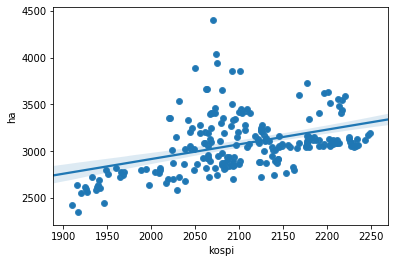

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=f['kospi'], y=f['ha'])
ax = sns.regplot(x=f['kospi'], y=f['ha'])

In [0]:
import statsmodels.api as sm
y=f['ha']
X=sm.add_constant(f['kospi'])
model=sm.OLS(y, X).fit() #y~x
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ha   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     46.82
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           7.75e-11
Time:                        04:32:21   Log-Likelihood:                -1547.6
No. Observations:                 220   AIC:                             3099.
Df Residuals:                     218   BIC:                             3106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -230.8761    483.705     -0.477      0.634   -1184.213     722.460
kospi          1.5734      0.230      6.843      0.000       1.120       2.027
==============================================================================
Omnibus:                       78.935   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.110
Skew:                           1.602   Prob(JB):                     3.91e-46
Kurtosis:                       6.542   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 산점도 해석

코스피랑 하림은 양의 상관관계를 갖는다.

2. 기울기 해석

기울기가 1보다 크므로 유동성이 커.

시장보다 주식의 변동이 크다.

3. 결정계수 해석

kospi는 하림에 17.7% 정도 영향을 미친다.

4. P-v 해석

Prob (F-statistic)가 0.001보다 작기 때문에
매우 유의함 ***(별 3개)

## 수익률

In [0]:
#f.set_index('Date',inplace=True)
f0 = f.diff(axis=0 , periods=1)/f.shift(periods=1)
f1 = f0.dropna()
f1.head(3)

,kospi,ha
Date,,
2019-01-03,-0.008109,0.003571
2019-01-04,0.008301,0.003559
2019-01-07,0.013357,0.014184


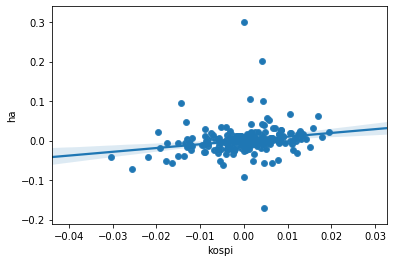

In [0]:
sns.scatterplot(x=f1['kospi'], y=f1['ha'])
ax = sns.regplot(x=f1['kospi'], y=f1['ha'])

In [0]:
import statsmodels.api as sm
y=f1['ha']
X=sm.add_constant(f1['kospi'])
model=sm.OLS(y, X).fit() #y~x
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ha   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     9.686
Date:                Thu, 21 Nov 2019   Prob (F-statistic):            0.00211
Time:                        04:39:35   Log-Likelihood:                 417.41
No. Observations:                 219   AIC:                            -830.8
Df Residuals:                     217   BIC:                            -824.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.112      0.911      -0.005       0.005
kospi          0.9552      0.307      3.112      0.002       0.350       1.560
==============================================================================
Omnibus:                      191.600   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6994.814
Skew:                           3.026   Prob(JB):                         0.00
Kurtosis:                      30.017   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. 산점도 해석

코스피랑 하림은 양의 상관관계를 갖는다.

2. 기울기 해석

기울기가 1보다 작으므로 유동성이 작음.

시장보다 하림 주식의 변동이 작다.

3. 결정계수 해석

kospi는 하림에 4.3% 정도 영향을 미친다.

나머지(95.7%)는 코스피 외의 다른 요인에 의해 변동된다.

4. P-v 해석

Prob (F-statistic)가 0.05보다 작고 0.001보다 크기 때문에
 유의함 **(별 2개)